# Geospatial Insights into Water Availability and Infrastructure Performance

## Business understanding



#### *Objective:*
The primary business goal is to *predict the operational status* of waterpoints in Tanzania, classifying them into one of two categories:
1. *Functional* - Fully operational and providing water as intended.
2. *Non-functional* - Not operational and failing to provide water.

#### *Why It Matters:*
1. *Efficient Resource Allocation:* 
   - Predicting waterpoint conditions allows stakeholders (The Tanzanian Ministry of Water, NGOs) to allocate resources efficiently by prioritizing repairs and maintenance.
2. *Improved Accessibility to Water:*
   - Ensuring functional waterpoints in rural and urban areas is crucial for providing clean water to communities, improving public health, and reducing waterborne diseases.
3. *Cost Optimization:*
   - By proactively predicting failures, unnecessary repair costs can be avoided, and funds can be channeled to more critical interventions.
4. *Sustainability:*
   - Understanding patterns in failures helps in better planning for future installations, improving waterpoint durability.

---

#### *Key Stakeholders:*
1. *Government Agencies* (Tanzanian Ministry of Water):
   - Responsible for policy-making and infrastructure maintenance.
2. *NGOs and Charities:*
   - Focused on improving access to clean water.
3. *Local Communities:*
   - Beneficiaries of operational waterpoints.
4. *Donors and Funders:*
   - Interested in the impact of their investments in water infrastructure.

---

#### *Problem description:*
The dataset provides a variety of features that capture the physical attributes, installation details, geographic location, and usage patterns of the waterpoints. These variables can help answer questions such as:
1. *What factors contribute most to waterpoint failures?*
2. *Are certain geographic areas more prone to non-functional waterpoints?*
3. *How do management and funding affect waterpoint longevity?*
4. *Can the age of a waterpoint (construction year) predict its condition?*

---

#### *Expected Outcome:*
A machine learning model that:
1. Accurately predicts the operational status of a waterpoint.
2. Identifies key factors affecting functionality.
3. Provides actionable insights for maintaining and repairing waterpoints.

---

#### *Potential Challenges:*
1. *Data Quality:* Missing or inconsistent entries in key variables (e.g., funder, construction year).
2. *Class Imbalance:* If most waterpoints are functional, predicting minority classes (e.g., non-functional) can be challenging.
3. *Geographic and Temporal Variability:* Different regions may have unique issues (e.g., drought, poor maintenance) that complicate predictions.
4. *Interpretability:* Translating complex model outputs into actionable insights for stakeholders.

---

#### *Key Deliverables:*
1. *Classification Model:* A robust algorithm to predict waterpoint status.
2. *Feature Analysis Report:* Insights into which factors most influence waterpoint conditions.
3. *Dashboard or Visualization Tools:* To enable stakeholders to view and act on predictions and insights.

## Data Understanding

In [217]:
# Import necessary modules for data understanding
import pandas as pd
import numpy as np

In [218]:
# Load the datasets
data1 =pd.read_csv('Data/Train_predictors.csv')
data2 =pd.read_csv('Data/Train_labels.csv')
Test_data =pd.read_csv('Data/Test_predictors.csv')

# Merge data1 and data2 using the id as the refrence variable
Train_data_labels = pd.merge(data2,data1,how='left')


In [219]:
Train_data_labels.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [220]:
# Check info about the object variables in the data
Train_data_labels.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_group           59400 non-null  object
 1   date_recorded          59400 non-null  object
 2   funder                 55765 non-null  object
 3   installer              55745 non-null  object
 4   wpt_name               59400 non-null  object
 5   basin                  59400 non-null  object
 6   subvillage             59029 non-null  object
 7   region                 59400 non-null  object
 8   lga                    59400 non-null  object
 9   ward                   59400 non-null  object
 10  public_meeting         56066 non-null  object
 11  recorded_by            59400 non-null  object
 12  scheme_management      55523 non-null  object
 13  scheme_name            31234 non-null  object
 14  permit                 56344 non-null  object
 15  extraction_type    

In [221]:
# Check info 
Train_data_labels.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 5.0 MB


In [222]:
# Investigate the response variable
Train_data_labels.status_group.value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

class imbalance present in the response variable 

In [223]:
# subset functional needs repair from the dataset
Train_data_labels=Train_data_labels.loc[Train_data_labels['status_group'] !='functional needs repair'].copy()

## Data Cleaning
- Check for missing values and imputing them
- Checking for duplicates
- Drop irrelevant columns
- Check for outliers and handling them in the data



In [224]:
# Import modules to use for data cleaning
import seaborn as sns
import matplotlib.pyplot as plt

### 1). Missing values

In [225]:
# Check for missing values
missing_val =Train_data_labels.isna().sum()
missing_val[missing_val>0]

funder                3198
installer             3215
subvillage             370
public_meeting        3178
scheme_management     3654
scheme_name          26162
permit                2756
dtype: int64

Most of the columns with missing values are objects. For columns with more than 20% missing values we will drop otherwise replace with value `mising`.

### 2). Duplicates

In [226]:
# Check for duplicates
Train_data_labels.duplicated().sum()


0

The Tanzania water pumps dataset does not contain duplicated data

In [227]:
Train_data_labels.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [379]:
# Lets change construction year to a discrete variable. To allow for better interpration.
 # creating new columns
Train_data_labels['decade'] = Train_data_labels['construction_year']
# Create a dictionary to map years to decades
decade_mapping = {
**dict.fromkeys(range(1960, 1970), '60s'),
**dict.fromkeys(range(1970, 1980), '70s'),
**dict.fromkeys(range(1980, 1990), '80s'),
**dict.fromkeys(range(1990, 2000), '90s'),
**dict.fromkeys(range(2000, 2010), '00s'),
**dict.fromkeys(range(2010, 2014), '10s')
}
# Apply the mapping to the 'decade' column
Train_data_labels['decade'] = Train_data_labels['decade'].map(decade_mapping)
Train_data_labels['decade'].value_counts()

00s    14353
90s     7160
80s     5155
10s     4941
70s     4058
60s      496
Name: decade, dtype: int64

### 3). Dropping Irrelevant columns

In [ ]:
# Drop Columns 
columns_drop = ['id','scheme_name','num_private','subvillage','lga','ward','recorded_by',
                'construction_year','extraction_type','extraction_type_group','management','payment_type','quality_group',
                'quantity_group','source', 'source_type','waterpoint_type']

new_data = Train_data_labels.drop(columns=columns_drop).copy()


In [480]:
## Updates
update_drop = ['id','scheme_name','recorded_by','decade']
# For the Neural network models:
nn_data = Train_data_labels.drop(columns=update_drop)
nn_data.fillna("missing",inplace=True)

For the purpose of interpretability of the model and following the principle of pharsimony. I chose to drop the above columns based on the following reasons:
* Columns that had been repeated but with different column names
* Categorical variable that had many distinct values in our data
* Columns with higher number of rows with missing values 

### 4). Imputing missing values

In [477]:
# Performing data imputation to replace missing values
missing_val =new_data.isna().sum()
missing_val[missing_val>0]


funder                3198
installer             3215
public_meeting        3178
scheme_management     3654
permit                2756
decade               18920
dtype: int64

In [478]:
new_data.fillna("missing",inplace=True)
new_data.isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
decade                   0
dtype: int64

### 5). Investigating outliers

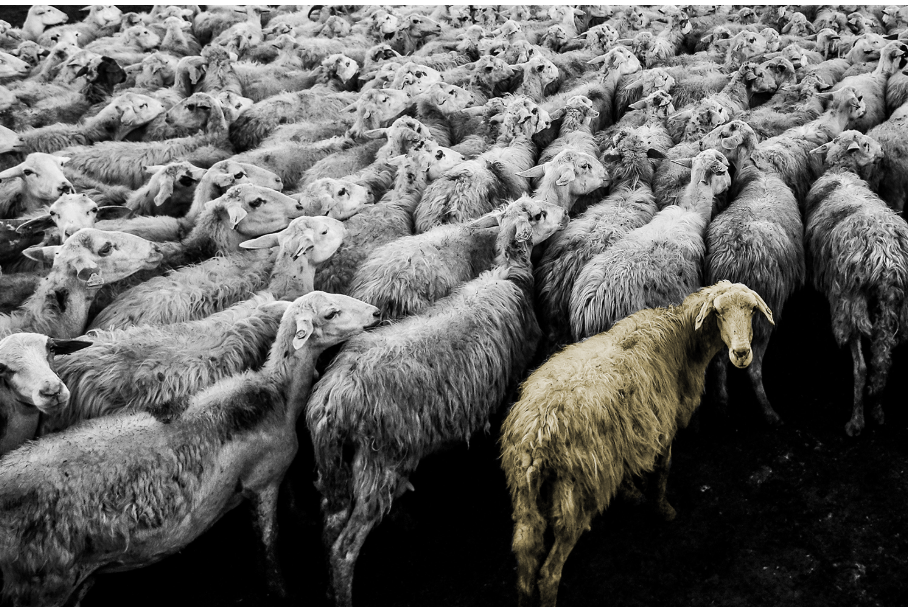

In [231]:
# ....Investigate outliers
new_data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount_tsh     55083 non-null  float64
 1   gps_height     55083 non-null  int64  
 2   longitude      55083 non-null  float64
 3   latitude       55083 non-null  float64
 4   region_code    55083 non-null  int64  
 5   district_code  55083 non-null  int64  
 6   population     55083 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.4 MB


<AxesSubplot:xlabel='population', ylabel='Count'>

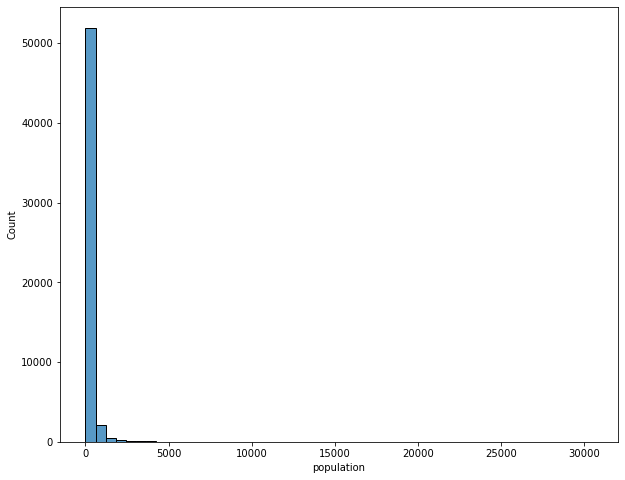

In [232]:
numeric_data = new_data.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.histplot(numeric_data,x='population',bins=50)

## Exploratory Data Analysis


For this section we will try and be one with the data🙏🏿.By experimenting different statistical tests and techniques we aim to get a deeper understanding of the data as well as insights that we will use for modelling. To do so let's summon the greatest explorer of our time...


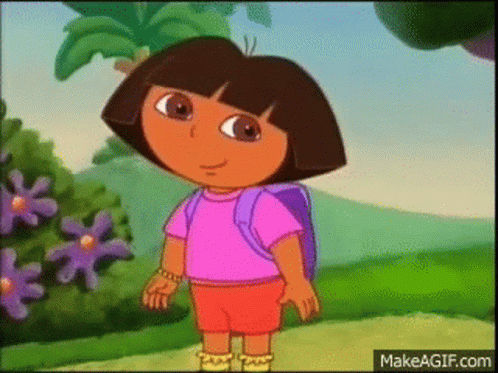





- Normalize/Standardize the data
- Validate data accuracy (Making sure our data aligns with real-world scenario)


In [459]:
# Import helper functions to help visualize our data
from functions import plot_category

### 1). Univariate Analysis

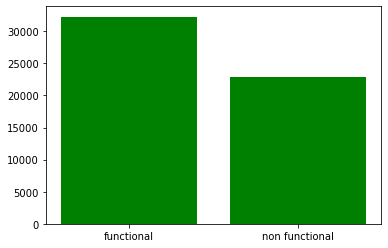

In [234]:
# Plotting the response variable 
res =new_data.status_group.value_counts()
plt.bar(x=res.index,height=res.values,color='green');


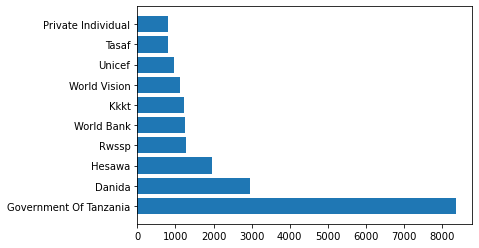

In [235]:
# Investigate the top ten funders
cat_plot =new_data.funder.value_counts(ascending=False).drop(labels='missing').head(10)
cat_plot
plt.barh(y=cat_plot.index,width=cat_plot.values);


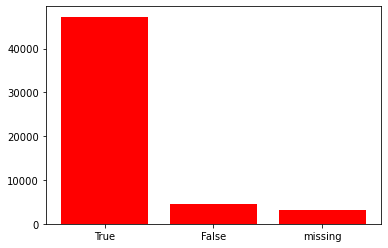

In [236]:
# Investigate Public meetings
meet =new_data.public_meeting.value_counts()
plt.bar(x=[str(x) for x in meet.index],height=meet.values,color='red');


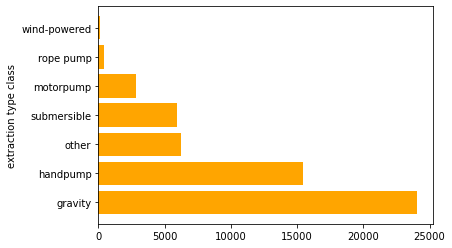

In [237]:
# Plot the extraction_type class
extr = new_data.extraction_type_class.value_counts()

plt.barh(y=extr.index,width=extr.values,color ='orange')
plt.ylabel('extraction type class');

### 2).Bivariate Visualization

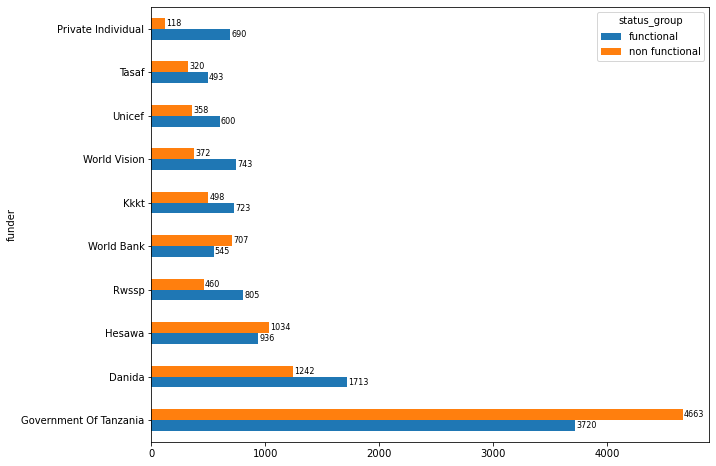

In [238]:
# since we have alot of levels in the categorical variable funder
# filtering for the top ten funders in the data could aid in visualizing
rows_filter=list(cat_plot.index) # create a list of funders we want to keep
plot_data=new_data.apply(lambda row:row[new_data['funder'].isin(rows_filter)])


crosstab_data =pd.crosstab(plot_data['funder'],plot_data['status_group'])

# Sort funders by the total number of water points
crosstab_data['Total'] = crosstab_data.sum(axis=1)
crosstab_data = crosstab_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])


ax=crosstab_data.plot(kind='barh',stacked=False,figsize=(10,8));

# Add labels to the bars
# Manually add labels to the bars
for i, container in enumerate(ax.patches):
    # Each bar has a width corresponding to its value
    value = container.get_width()  # Bar value
    # Position the label
    ax.text(value + 10, container.get_y() + container.get_height() / 2,  # Slightly offset from the bar edge
            f'{int(value)}', va='center', fontsize=8)


In [239]:
# chi-square test
from scipy import stats

crosstab= pd.crosstab(plot_data['funder'],plot_data['status_group'])
print(stats.chi2_contingency(crosstab))

(902.8940071619397, 1.472005828590181e-188, 9, array([[1562.70202507, 1392.29797493],
       [4433.20848602, 3949.79151398],
       [1041.80135005,  928.19864995],
       [ 645.70530376,  575.29469624],
       [ 427.29720347,  380.70279653],
       [ 668.97396336,  596.02603664],
       [ 429.94136933,  383.05863067],
       [ 506.62217936,  451.37782064],
       [ 662.09913211,  589.90086789],
       [ 589.64898746,  525.35101254]]))


- The very high Chi-square statistic (902.8940071619397) and extremely small p-value(1.472005828590181e-188) and a degree of freedom of 9 suggest a strong association between the two categorical variables funder and status group.

- The largest contributors to the Chi-square statistic are likely Government of Tanzania, DANIDA, and Private Individual, given their high absolute counts and discrepancies between functional and non-functional water points.

 **Insights:** 
- Funders like Government of Tanzania and HESAWA may require further analysis to understand why their non-functional water points are so high despite large investments.
- Private Individuals might benefit from technical or financial support to improve their success rate in maintaining functional water points.
- Focus on funders with a higher proportion of functional water points (e.g., DANIDA ) could offer insights into best practices.



In [240]:
#Performing a chi-square test  Public meeting and Status group
crosstab2 = pd.crosstab(new_data['status_group'],new_data['public_meeting'])
print(stats.chi2_contingency(crosstab2))

(337.2364452458683, 5.8889296543293905e-74, 2, array([[ 2701.57338925, 27696.25162028,  1861.17499047],
       [ 1911.42661075, 19595.74837972,  1316.82500953]]))


**Chi-square Statistic: `337.236`**

- This indicates the overall difference between observed and expected frequencies. Larger values suggest a stronger association between the variables (in this case, public_meeting and status_group).

**P-value: `5.88e-74`**

- This is extremely small (practically 0), meaning there is a statistically significant association between whether a public meeting was held (public_meeting) and the functionality of the water point (status_group).

In [241]:
crosstab3 = pd.crosstab(new_data['status_group'],new_data['extraction_type_class'])
crosstab3

stats.chi2_contingency(crosstab3)

(6091.882188033732,
 0.0,
 6,
 array([[14101.70943848,  9054.63389794,  1668.49828441,  3645.04504112,
           254.16927183,  3470.52328305,    64.42078318],
        [ 9977.29056152,  6406.36610206,  1180.50171559,  2578.95495888,
           179.83072817,  2455.47671695,    45.57921682]]))

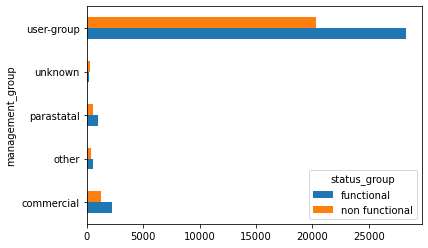

In [242]:
crosstab4 = pd.crosstab(new_data['management_group'],new_data['status_group'])
crosstab4.plot(kind='barh',stacked=False);

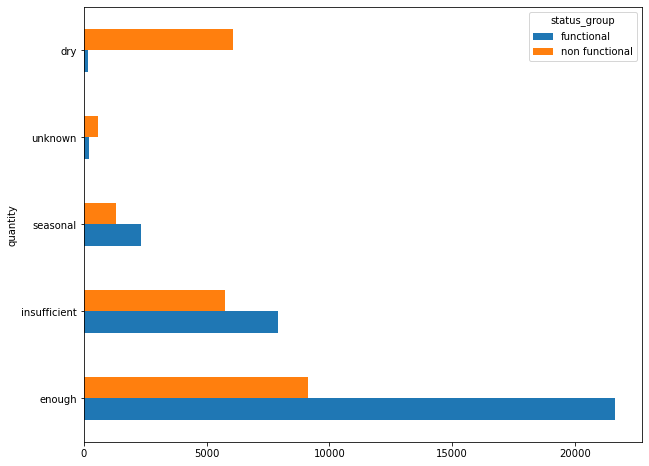

In [243]:
crosstab5 = pd.crosstab(new_data['quantity'],new_data['status_group'])
crosstab5.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

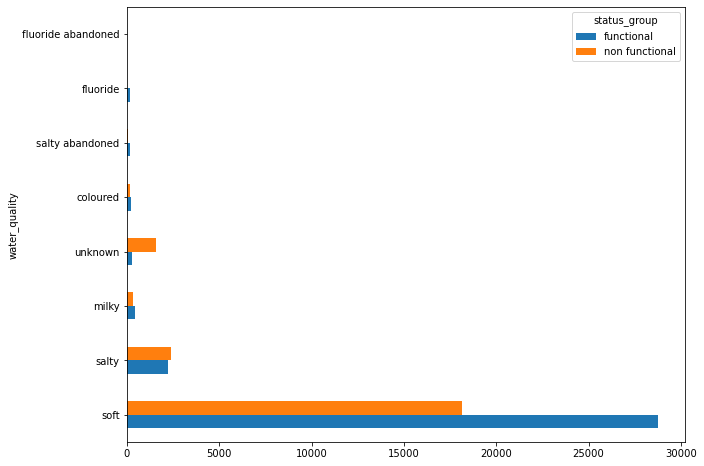

In [244]:
crosstab6 =pd.crosstab(new_data['water_quality'],new_data['status_group'])
crosstab6.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

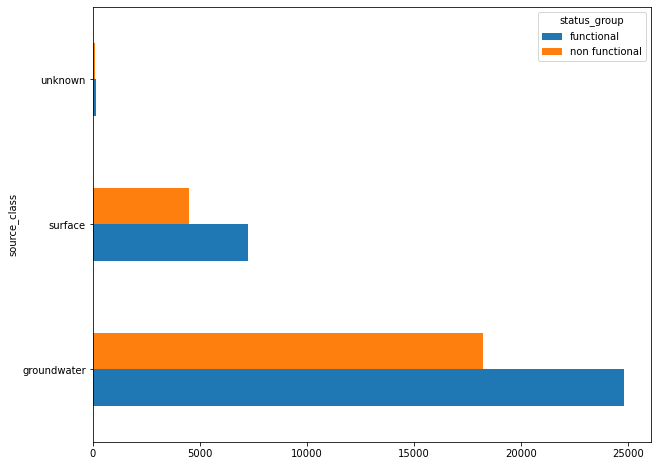

In [245]:
crosstab7=pd.crosstab(new_data['source_class'],new_data['status_group'])
crosstab7.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

(5768.458410071031,
 0.0,
 5,
 array([[6.67633571e+01, 4.72366429e+01],
        [1.85748544e+04, 1.31421456e+04],
        [4.09950438e+00, 2.90049562e+00],
        [9.63910609e+03, 6.81989391e+03],
        [4.09364795e+02, 2.89635205e+02],
        [3.56481188e+03, 2.52218812e+03]]))

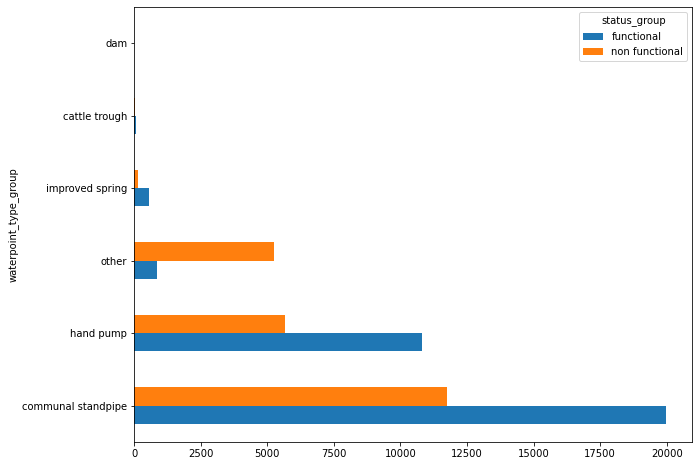

In [246]:
crosstab8=pd.crosstab(new_data['waterpoint_type_group'],new_data['status_group'])
crosstab8.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));
stats.chi2_contingency(crosstab8)

(5768.458410071031,
 0.0,
 5,
 array([[6.67633571e+01, 4.72366429e+01],
        [1.85748544e+04, 1.31421456e+04],
        [4.09950438e+00, 2.90049562e+00],
        [9.63910609e+03, 6.81989391e+03],
        [4.09364795e+02, 2.89635205e+02],
        [3.56481188e+03, 2.52218812e+03]]))

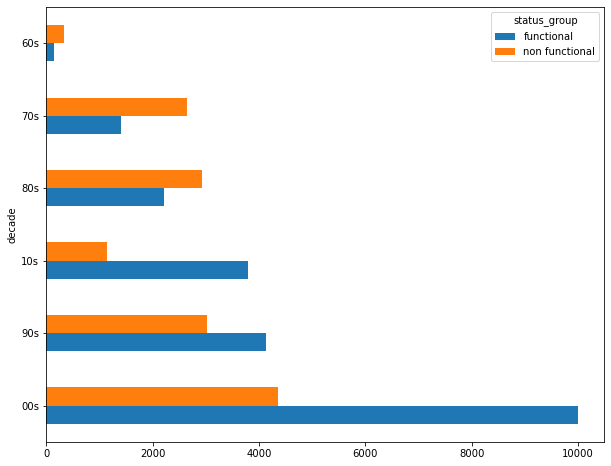

In [382]:
crosstab9 =pd.crosstab(new_data['decade'],new_data['status_group'])
crosstab9.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));
stats.chi2_contingency(crosstab8)

<AxesSubplot:>

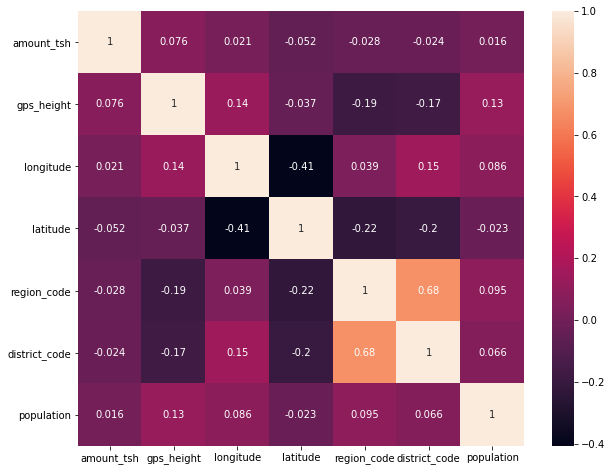

In [247]:
corr_data=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_data,annot=True)

## Modelling🤖🚀

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,plot_roc_curve,auc,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
# from functions import OneShotEncoding # Helper function
from sklearn.linear_model import LogisticRegression

### Pre-process data
- We want to separate the objects from float/numbers
- Standardise the numeric columns 
- Perfom one hot encoding 
- Merge the two datasets
- Split into train and test data


#### 1). Standardise the numerical columns

In [249]:
num_data=new_data.loc[:,['amount_tsh','gps_height','population']]

# Instantiate standardizer
scaler =StandardScaler()

# Fit on the data
num_data=pd.DataFrame(scaler.fit_transform(num_data),columns=num_data.columns)
num_data.head()

,amount_tsh,gps_height,population
0,1.852191,1.031757,-0.150280
1,-0.104905,1.044680,0.210205
2,-0.096750,0.020841,0.146962
3,-0.104905,-0.586570,-0.257793
4,-0.104905,-0.964227,-0.380062


#### 2).Perfome one hot encoding 

In [383]:
obj_col = ['permit','extraction_type_class', 'management_group', 'payment', 'water_quality',
            'quantity', 'source_class', 'public_meeting','waterpoint_type_group','basin','decade']

obj_data =new_data.loc[:,obj_col]

encoded_data =pd.get_dummies(obj_data,drop_first=True)
encoded_data.head()
encoded_data.index =num_data.index # make sure the index align

#### 3). Merge the datasets

In [384]:
Final_data =pd.merge(num_data,encoded_data,how='left',left_index=True,right_index=True)

In [252]:
# Define response variable
Y=new_data.status_group.map({'functional':0,'non functional':1})

#### 4). Split the Train and Test data

In [386]:
 
X_train,X_test,y_train,y_test = train_test_split(Final_data,Y,test_size=0.2,random_state=42)


In [404]:
X_test.shape

(11017, 52)

### Logistic Regression

In [387]:
# Fit a logistic model
Model = LogisticRegression(max_iter=1000)
Model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [388]:
# Perform cross validation of the model
scores = cross_val_score(Model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.781484   0.78103018 0.78193783 0.7776265  0.78057636 0.78829135
 0.77462551 0.77757603 0.77734907 0.77485247]


In [389]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7746255106672719, 0.7795349308619628, 0.7882913546630361)

So the range of our accuracy is between 0.76 to 0.78 but generally 0.77 on average.

In [390]:
y_pred=Model.predict(X_test)
f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(f1score * 100))

F1-score: 68.71%


In [391]:
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)

0.591745177209511

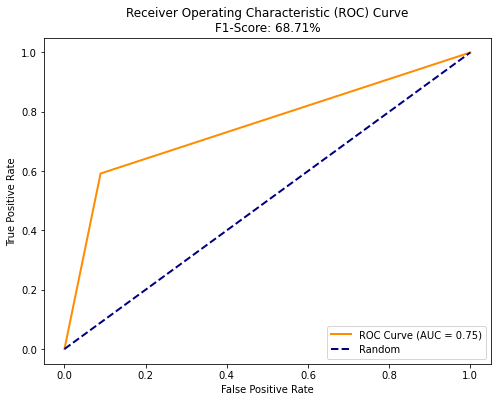

In [392]:
def plot_roc(y_test,y_pred,f1_score):    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred )
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve\nF1-Score: {:.2f}%'.format(
        f1_score * 100))
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test,y_pred,f1score)

In [260]:
classes = list(new_data.status_group.unique())

from functions import plot_confusion_matrix

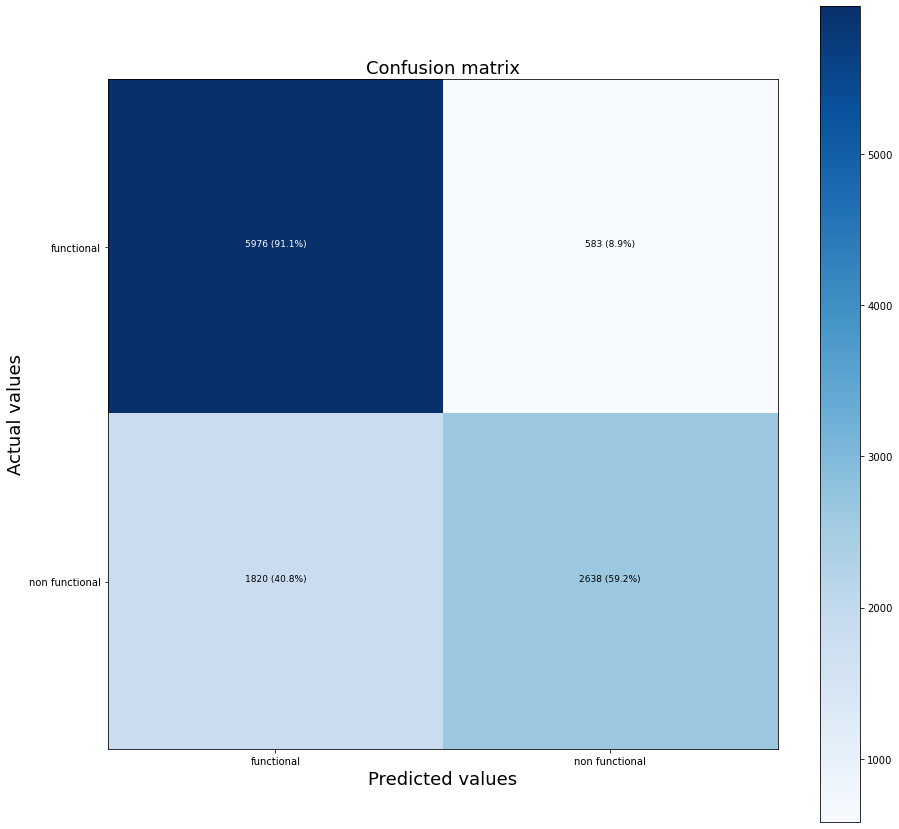

In [393]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

In [262]:
y_train.value_counts()

0    25700
1    18366
Name: status_group, dtype: int64

In [263]:
y_test.value_counts()

0    6559
1    4458
Name: status_group, dtype: int64

#### Addressing Class Imbalance

In [264]:
from imblearn.combine import SMOTEENN # Address outliers
from imblearn.over_sampling import SMOTENC # When data has categorical features


In [265]:
y_train.value_counts()

0    25700
1    18366
Name: status_group, dtype: int64

##### 1. SMOTEENN

In [394]:
smote_enn =SMOTEENN()
X_resample , y_resample =smote_enn.fit_resample(X_train,y_train)
y_resample.value_counts()

0    16669
1    16280
Name: status_group, dtype: int64

In [395]:
# Fit a model on the resampled data
Smotenn_model = LogisticRegression(max_iter=1000,random_state=42)
Smotenn_model.fit(X_resample,y_resample)

# Get the F1-score 
y_pred=Smotenn_model.predict(X_test)
f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(f1score * 100))

F1-score: 70.26%


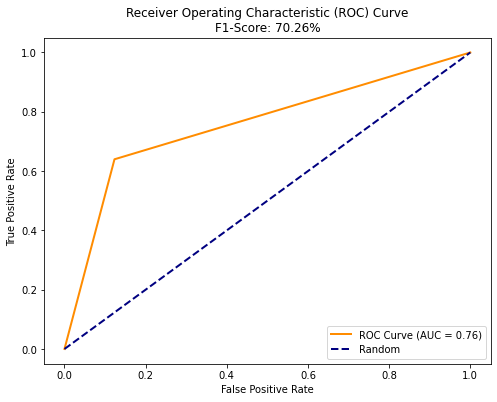

In [397]:
plot_roc(y_test,y_pred,f1score)

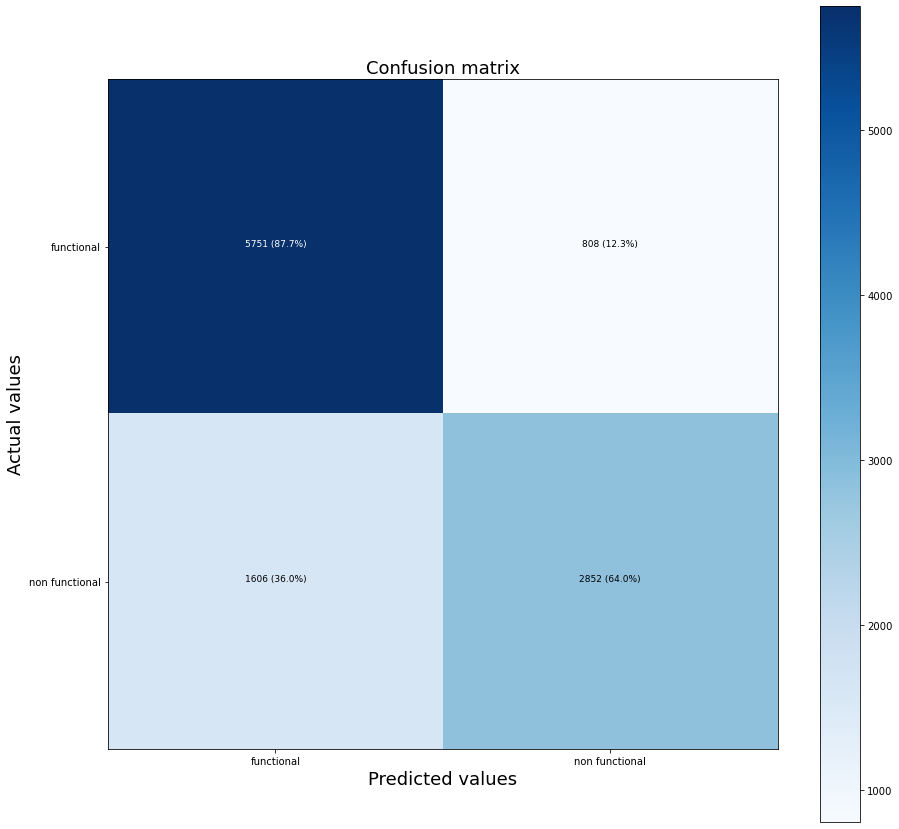

In [398]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

##### 2. SMOTENC

In [399]:
# Indicate which features are categorical
categorical_frts = list(range(3,49))

# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features=categorical_frts, random_state=42)

# Perform the resampling
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

y_resampled.value_counts()

0    25700
1    25700
Name: status_group, dtype: int64

In [441]:
# Fit a model on the resampled data
Smotecn_model = LogisticRegression(C=4.281332398719396, max_iter=1000, random_state=42,
                   solver='sag')
Smotecn_model.fit(X_resampled,y_resampled)

# Get the F1-score 
y_pred=Smotenn_model.predict(X_test)
log_f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(log_f1score * 100))

F1-score: 70.26%


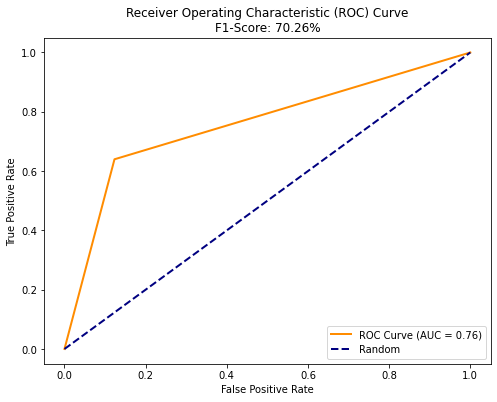

In [401]:
plot_roc(y_test,y_pred,f1score)

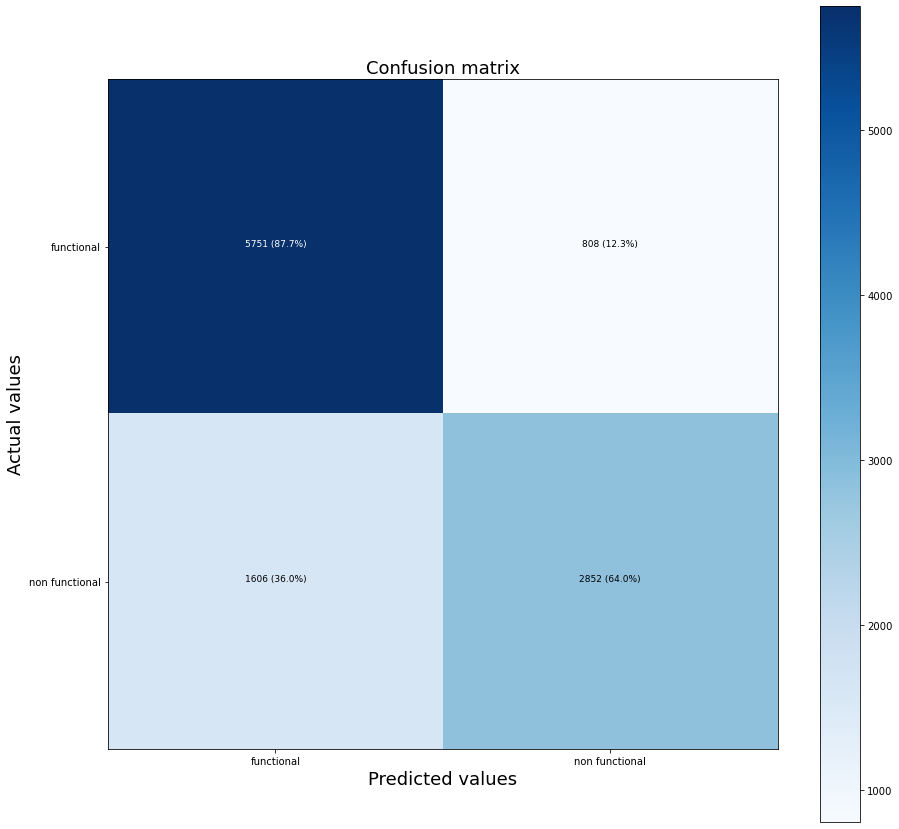

In [402]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

#### Fine Tuning 

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
# Fine tuning the model with the highest f1-score
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga']
}
]

In [276]:

clf_CV = GridSearchCV(Smotecn_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf_CV

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
# Get the best estimators
# best_clf = clf_CV.fit(X_resampled,y_resampled)
# best_clf.best_estimator_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 34.0min finished


LogisticRegression(C=4.281332398719396, max_iter=1000, random_state=42,
                   solver='sag')

In [ ]:
# Y_preds =best_clf.predict(X_test)
# log_f1_score=f1_score(y_true=y_test,y_pred=Y_preds)
# log_f1_score

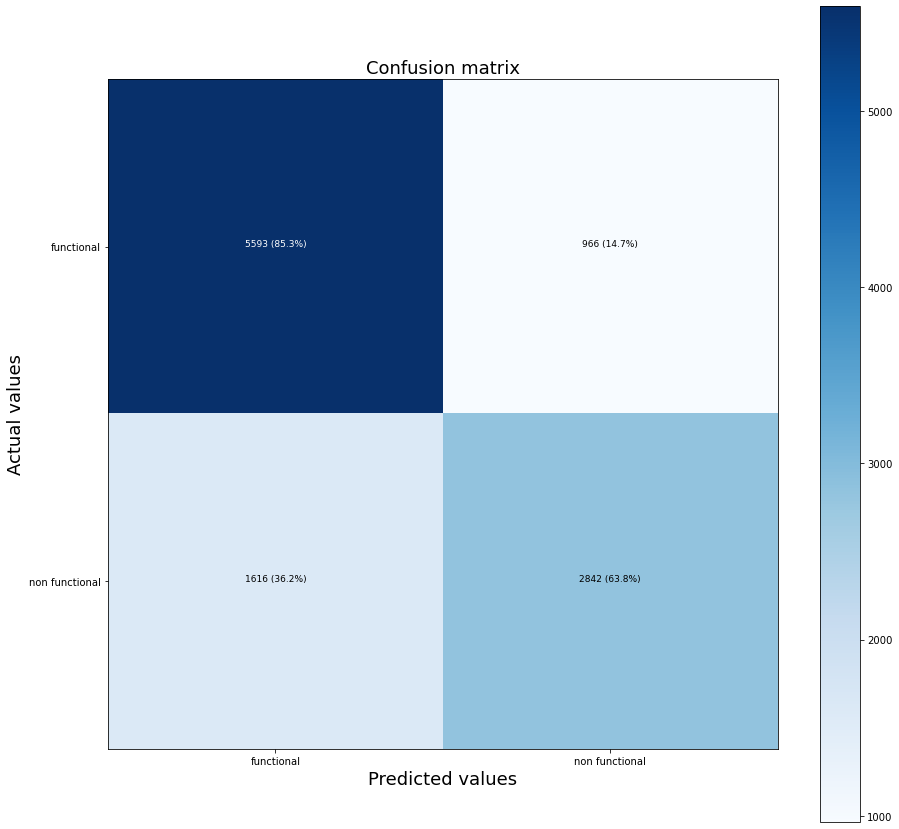

In [ ]:
# plot_confusion_matrix(y_preds=Y_preds,y_test=y_test,classes=classes)

### Decision Trees

In [280]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

#### 1.) Training with Gini index

In [415]:
# Increasing the depth to increase accuracy and find the optimum value
train_accuracy = []
test_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeClassifier(max_depth=depth,criterion="gini", random_state=42)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_resampled, y_resampled))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [416]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(15)

,max_depth,train_acc,test_acc
0,1,0.600798,0.672597
1,2,0.669280,0.666243
2,3,0.692704,0.735409
3,4,0.717977,0.764546
4,5,0.725292,0.768267
5,6,0.728911,0.768993
6,7,0.755409,0.787329
7,8,0.760272,0.789326
8,9,0.780097,0.793592
9,10,0.788210,0.798584


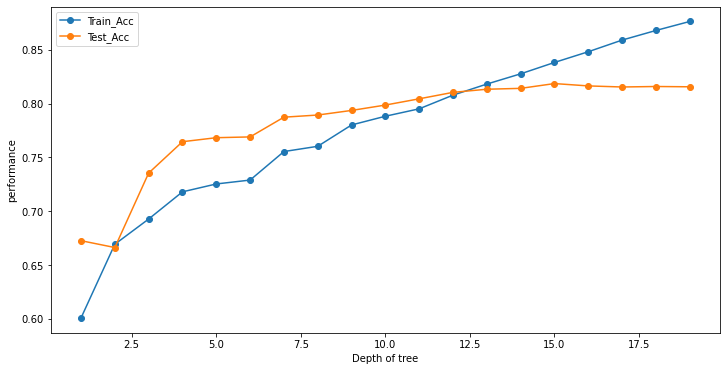

In [417]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label = 'Train_Acc')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o',label = 'Test_Acc')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend();

In [418]:
def train_using_gini(X_train,y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=12, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [419]:
Model_tree =train_using_gini(X_train=X_resampled,y_train=y_resampled)

# Predict on the test data
y_pred =Model_tree.predict(X_test)
tree_f1score = f1_score(y_true=y_test,y_pred=y_pred)
# Evaluate the model
print('Accuracy_score :',accuracy_score(y_true=y_test,y_pred=y_pred))
print('F1_score :',f1_score(y_true=y_test,y_pred=y_pred))

Accuracy_score : 0.7997640010892257
F1_score : 0.7383776091081593


In [420]:
y_predd = Model_tree.predict(X_resampled)
accuracy_score(y_true=y_resampled,y_pred=y_predd)

0.8071400778210117

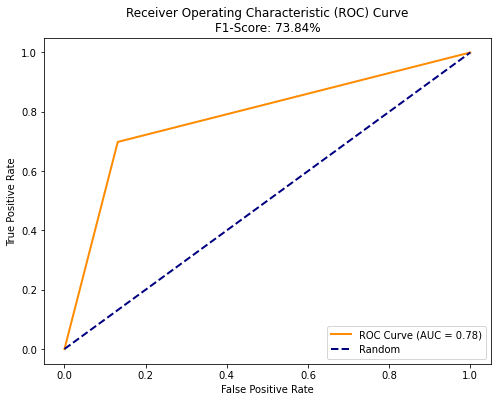

In [422]:
plot_roc(y_test,y_pred,tree_f1score)

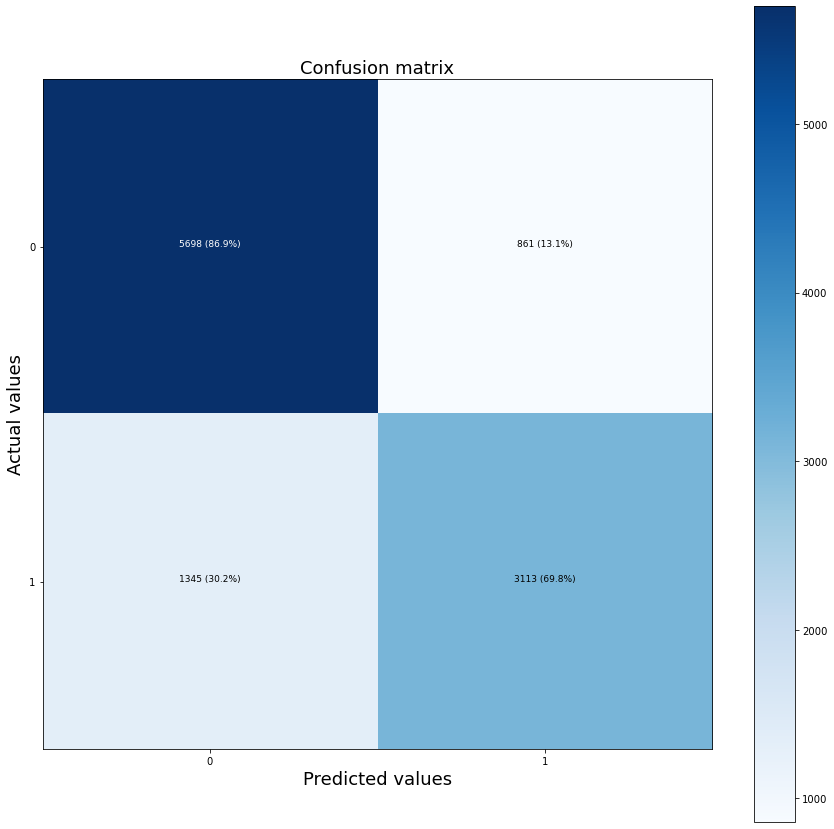

In [423]:
plot_confusion_matrix(y_test=y_test,y_preds=y_pred)

In [424]:
print(classification_report(y_test, y_pred,target_names=classes))

                precision    recall  f1-score   support

    functional       0.81      0.87      0.84      6559
non functional       0.78      0.70      0.74      4458

      accuracy                           0.80     11017
     macro avg       0.80      0.78      0.79     11017
  weighted avg       0.80      0.80      0.80     11017



#### 2). Training with entropy

In [425]:
# Increasing the depth to increase accuracy and find the optimum value
train_accuracy = []
test_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeClassifier(max_depth=depth,criterion="entropy", random_state=42)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_resampled, y_resampled))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [426]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(15)

,max_depth,train_acc,test_acc
0,1,0.600798,0.672597
1,2,0.669280,0.666243
2,3,0.692704,0.735409
3,4,0.717977,0.764546
4,5,0.723813,0.766633
5,6,0.727685,0.766724
6,7,0.750973,0.783607
7,8,0.755486,0.783970
8,9,0.776498,0.791867
9,10,0.786089,0.796406


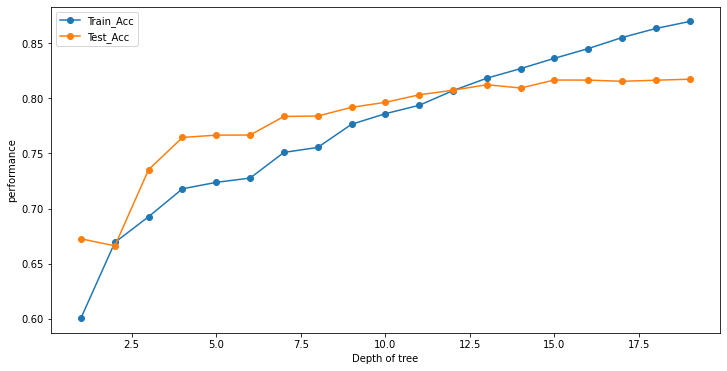

In [427]:

plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label = 'Train_Acc')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o',label = 'Test_Acc')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend();

In [410]:
def train_using_entropy(X_train,  y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=12, min_samples_leaf=10)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [411]:
Model_tree_ent =train_using_entropy(X_train=X_resampled,y_train=y_resampled)

# Predict on the test data
y_pred =Model_tree_ent.predict(X_test)
# Evaluate the model
tree_ent_f1score =f1_score(y_true=y_test,y_pred=y_pred)
print('Accuracy_score :',accuracy_score(y_true=y_test,y_pred=y_pred))
print('F1_score :',f1_score(y_true=y_test,y_pred=y_pred))

Accuracy_score : 0.8014886085141145
F1_score : 0.7404154302670624


In [290]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

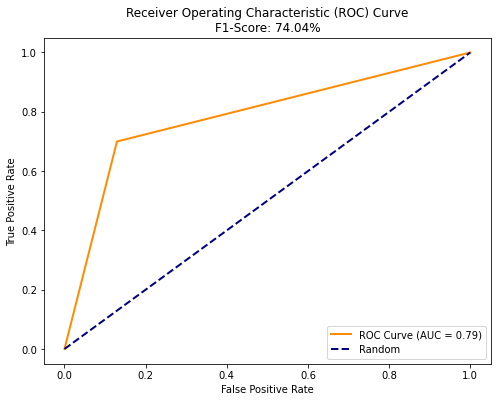

In [413]:
#Plot entropy tree

plot_roc(y_test,y_pred,tree_ent_f1score)

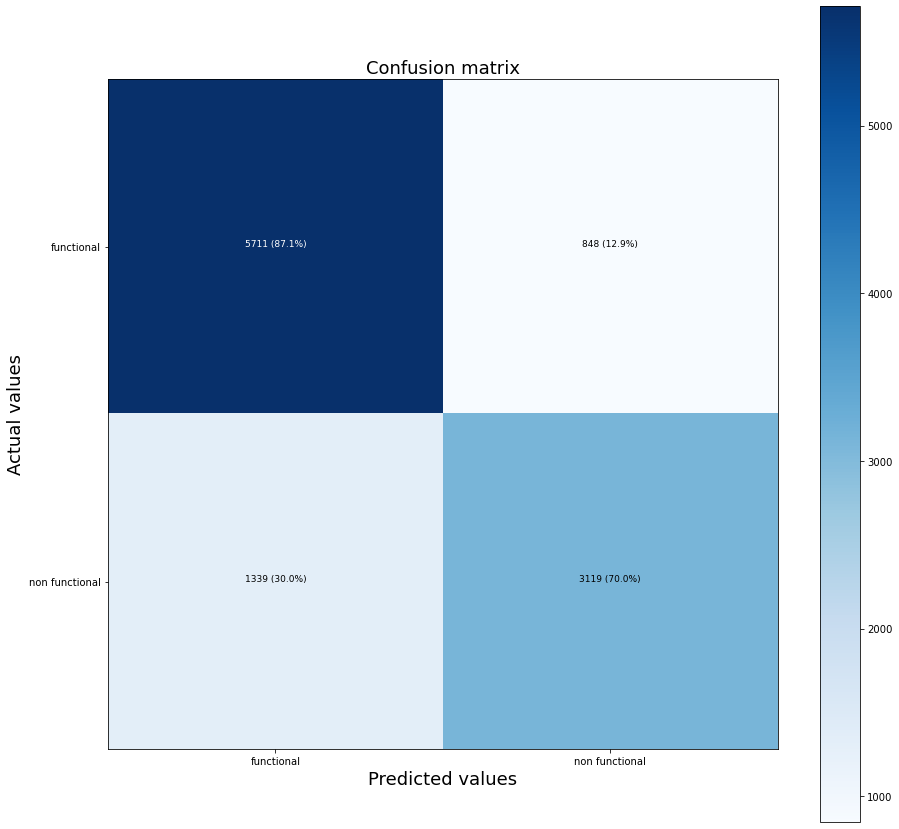

In [414]:
plot_confusion_matrix(y_preds=y_pred,y_test=y_test,classes=classes)

In [312]:
print(classification_report(y_test, y_pred,target_names=classes))

                precision    recall  f1-score   support

    functional       0.81      0.85      0.83      6559
non functional       0.77      0.70      0.73      4458

      accuracy                           0.79     11017
     macro avg       0.79      0.78      0.78     11017
  weighted avg       0.79      0.79      0.79     11017



### Neural network

In [335]:
import tensorflow as tf
import tensorflow.keras as keras


In [428]:
# Preprocess the data 
Train_data = np.expand_dims(X_train,axis=2)
Test_data = np.expand_dims(X_test,axis=2)

In [429]:
Train_data.shape

(44066, 52, 1)

In [431]:
# Build a deep network model with 2 hidden layer 
deep_neural = keras.models.Sequential([
    keras.layers.Input(shape=(52,1)),
    keras.layers.Conv1D(32,kernel_size=4,activation='relu',padding='valid'),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
]) 

# Compile model
deep_neural.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=['Precision','Recall'])

# Fit the model
history =deep_neural.fit(x=Train_data,
                         y=y_train,
                         epochs=40,
                         batch_size=32,
                         validation_data=(Test_data,y_test))

Epoch 1/40
1378/1378 [==============================] - 6s 4ms/step - loss: 0.5086 - precision: 0.8152 - recall: 0.5399 - val_loss: 0.4755 - val_precision: 0.8598 - val_recall: 0.5433
Epoch 2/40
1378/1378 [==============================] - 3s 2ms/step - loss: 0.4754 - precision: 0.8291 - recall: 0.5874 - val_loss: 0.4658 - val_precision: 0.7961 - val_recall: 0.6314
Epoch 3/40
1378/1378 [==============================] - 5s 4ms/step - loss: 0.4679 - precision: 0.8251 - recall: 0.6008 - val_loss: 0.4557 - val_precision: 0.8365 - val_recall: 0.5908
Epoch 4/40
1378/1378 [==============================] - 6s 4ms/step - loss: 0.4641 - precision: 0.8247 - recall: 0.6108 - val_loss: 0.4596 - val_precision: 0.8671 - val_recall: 0.5534
Epoch 5/40
1378/1378 [==============================] - 7s 5ms/step - loss: 0.4622 - precision: 0.8225 - recall: 0.6147 - val_loss: 0.4651 - val_precision: 0.8901 - val_recall: 0.5339
Epoch 6/40
1378/1378 [==============================] - 7s 5ms/step - loss: 0.46

In [432]:
# Compute F1_score
y_pred = tf.round(deep_neural.predict(Test_data))

cnn_f1_score= f1_score(y_true=y_test,y_pred=y_pred)

In [439]:
cnn_f1_score

0.7137335738211802

In [436]:
# Using resampled data
Train_data =np.expand_dims(X_resampled,axis=2)
Train_data.shape

(51400, 52, 1)

In [452]:
# Build a CNN network
tf.random.set_seed(42)
Model_cnn = keras.models.Sequential([
    keras.layers.Input(shape=(52,1)),
    keras.layers.Conv1D(32,kernel_size=4,activation='relu',padding='valid'),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


# Compile model
Model_cnn.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=["Precision",'Recall'])

# Fit the model
history=Model_cnn.fit(x=Train_data,
                         y=y_resampled,
                         epochs=5,
                         batch_size=32,
                         validation_data=(Test_data,y_test))

Epoch 1/5
1607/1607 [==============================] - 4s 3ms/step - loss: 0.5172 - precision: 0.7894 - recall: 0.6479 - val_loss: 0.4775 - val_precision: 0.8053 - val_recall: 0.5967
Epoch 2/5
1607/1607 [==============================] - 6s 4ms/step - loss: 0.4876 - precision: 0.8172 - recall: 0.6558 - val_loss: 0.4669 - val_precision: 0.7907 - val_recall: 0.6247
Epoch 3/5
1607/1607 [==============================] - 6s 4ms/step - loss: 0.4820 - precision: 0.8212 - recall: 0.6640 - val_loss: 0.4620 - val_precision: 0.7870 - val_recall: 0.6397
Epoch 4/5
1607/1607 [==============================] - 5s 3ms/step - loss: 0.4776 - precision: 0.8196 - recall: 0.6670 - val_loss: 0.4877 - val_precision: 0.7122 - val_recall: 0.7254
Epoch 5/5
1607/1607 [==============================] - 5s 3ms/step - loss: 0.4737 - precision: 0.8240 - recall: 0.6740 - val_loss: 0.4728 - val_precision: 0.7476 - val_recall: 0.6949


#### Model Evaluation

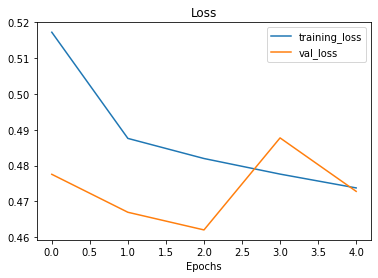

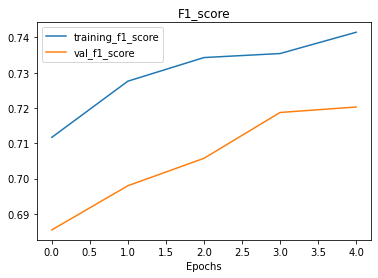

In [475]:
# Calculate the f1_score for the training data
def f1_calc(precision,recall):
    num= 2* (precision*recall)
    denom = (precision + recall)
    return(num/denom)


# Plot the loss curves and validation metrics
def plot_loss_curves(history,precision_recall=True):
  """
  Returns separate loss curves for training and validation metrics(precision and recall).

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  precision = history.history['precision']
  val_precision = history.history['val_precision']

  recall = history.history['recall']
  val_recall = history.history['val_recall']

  f1_score = f1_calc(precision=np.array(precision),recall=np.array(recall))
  val_f1_score = f1_calc(precision=np.array(val_precision),recall=np.array(val_recall))

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  # Plot f1_score
  plt.figure()
  plt.plot(epochs, f1_score, label='training_f1_score')
  plt.plot(epochs, val_f1_score, label='val_f1_score')
  plt.title('F1_score')
  plt.xlabel('Epochs')
  plt.legend();
  
  if precision_recall:     
  
    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('precision')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('recall')
    plt.xlabel('Epochs')
    plt.legend();

# from functions import plot_loss_curves
plot_loss_curves(history=history,precision_recall=False)


The f1_score indicates overfitting in the model we have to find techniques to try and reduce overfitting in the model

Ways to reduce overfitting:
1. **`Add more data-`** since neural network are not limited by how large the model becomes, the draw back to this it become hard to interpret the model architecture. But since we are intersted in Increasing the performance of the model we can add more columns to see if it can add more information to the model
2. **`Add regularization to the model-`** Adding more layers of MaxPooling1D to try and filter through less noise in the training data
 


In [484]:
# Refer back to the data cleaning process 

# Standardising the numerical inputs
num_data = nn_data.select_dtypes(include='number')
num_data =pd.DataFrame(scaler.fit_transform(num_data),columns=num_data.columns)

# Perform one hot encoding using pd.get_dummies
obj_data = nn_data.select_dtypes(include='object')
obj_data=pd.get_dummies(obj_data)

obj_data.index =num_data.index

nn_Final=pd.merge(num_data,obj_data,left_index=True,right_index=True)




MemoryError: Unable to allocate 1.80 GiB for an array with shape (35005, 55083) and data type uint8

In [483]:
nn_Final

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group_functional,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,1,...,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,1,...,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009,1,...,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0,31.130847,-1.825359,0,18,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,1,...,0,0,0,0,0,1,0,0,0,0
59396,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,1,...,0,0,0,0,0,1,0,0,0,0
59397,0.0,0,34.017087,-8.750434,0,12,7,0,0,1,...,0,1,0,0,0,0,0,1,0,0
59398,0.0,0,35.861315,-6.378573,0,1,4,0,0,1,...,0,1,0,0,0,0,0,1,0,0


f1_score = 2*(precision *recall)/ (precision + recall)

In [ ]:
# Calculate the f1_score for the training data
def f1_calc(precision,recall):
    num= 2* (precision*recall)
    denom = (precision + recall)
    return(num/denom)

f1_calc(np.array(history.history['precision']),np.array(history.history['recall']))

# Plot the f1_score


# Training_metrics=['precision','recall']


array([0.71169996, 0.72761418, 0.73430577, 0.73544429, 0.74147635])

In [451]:
y_pred=tf.round(Model_cnn.predict(Test_data))
y_pred
recall_score(y_true=y_test,y_pred=y_pred)

0.6949304620906236

### Model Comparison

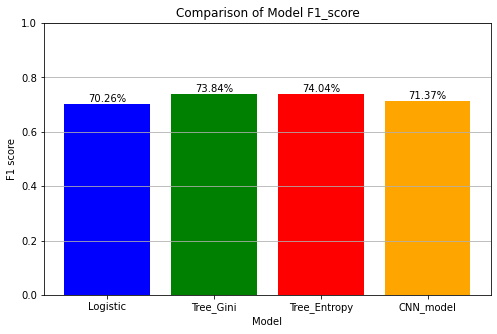

In [442]:
Model_names = ['Logistic','Tree_Gini','Tree_Entropy','CNN_model']

F1_score = [log_f1score,tree_f1score,tree_ent_f1score,cnn_f1_score]

plt.figure(figsize=(8, 5))
# Plotting the accuracies
bars = plt.bar(Model_names, F1_score, color=['blue', 'green','red','orange'])
# Adding labels and title
plt.xlabel('Model')
plt.ylabel('F1 score')
plt.title('Comparison of Model F1_score')
# Adding percentage annotations above the bars
for bar, acc in zip(bars, F1_score):
 plt.text(bar.get_x() + bar.get_width() / 2,
 bar.get_height(),
 f'{acc:.2%}',
 ha='center',
 va='bottom')
# Displaying the plot
plt.ylim(0, 1) # setting y-axis limit between 0 and 1
plt.grid(axis='y') # adding gridlines for y-axis
plt.show()

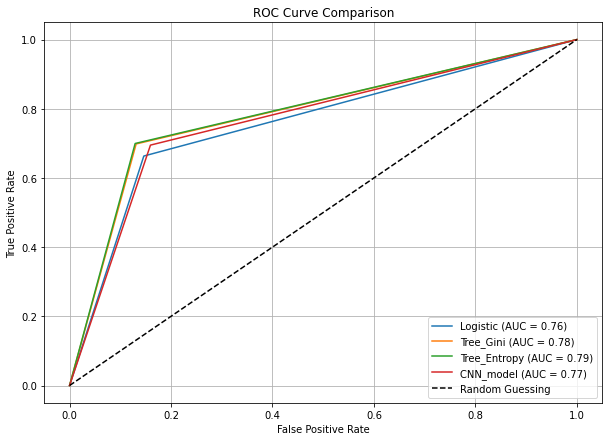

In [450]:
# Function to plot ROC curve
def plot_roc_curve(models, X_resampled, y_test, model_names):
    plt.figure(figsize=(10, 7))
    for model, name in zip(models, model_names):
        if name == "CNN_model":
            y_probs = tf.round(model.predict(Test_data))
        else:
            y_probs = model.predict(X_resampled)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        # print(name)

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curves for all models
models = [Smotecn_model ,Model_tree,Model_tree_ent,Model_cnn]
model_names = ['Logistic','Tree_Gini','Tree_Entropy','CNN_model']
plot_roc_curve(models, X_test, y_test, model_names)

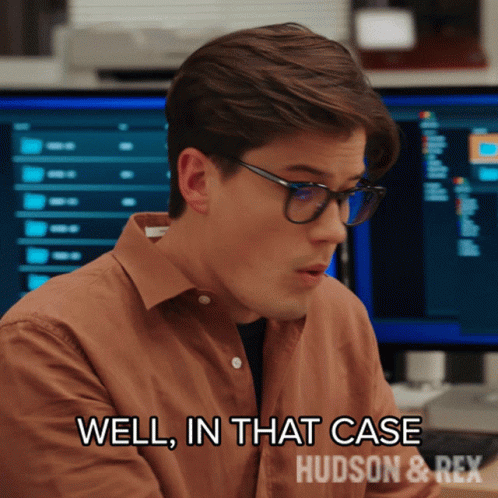

## Saving Best Model

In [332]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "Borehole_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(Model_tree_ent, file)